<table>
    <tr>
        <td>
            <div align ="center">
                <font color="#21618C" size=8px>
                    <b> Machine Learning project <br> on Stroke Prediction
                    </b>
                </font>
            </div>
        </td>
    <tr>
<table>

# Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off.

The main symptoms of stroke can be remembered with the word FAST:

Face – the face may have dropped on 1 side, the person may not be able to smile, or their mouth or eye may have dropped.

Arms – the person with suspected stroke may not be able to lift both arms and keep them there because of weakness or numbness in arm.

Speech – their speech may be slurred or garbled, or the person may not be able to talk at all despite appearing to be awake; they may also have problems understanding what you're saying to them.

Time – it's time to dial 999 immediately if you see any of these signs or symptoms.

# DATA DESCRIPTION:                                      
1) id: unique identifier                                                   
2) gender: "Male", "Female" or "Other"                                                        
3) age: age of the patient                                                           
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension                                 
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease                      
6) ever_married: "No" or "Yes"                                                     
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"                    
8) Residence_type: "Rural" or "Urban"                     
9) avg_glucose_level: average glucose level in blood                         
10) bmi: body mass index                                
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"                                                   
12) stroke: 1 if the patient had a stroke or 0 if not        
Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Importing libraries

In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from IPython.display import Image 
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
plt.rcParams['figure.figsize'] = [15,8]
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

In [9]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# Read the csv file

In [10]:
df = pd.read_csv('stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,nan,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1


In [11]:
df.shape

(5110, 12)

In [12]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Exploratory Data Analysis

## Heatmap Correlation

<AxesSubplot:>

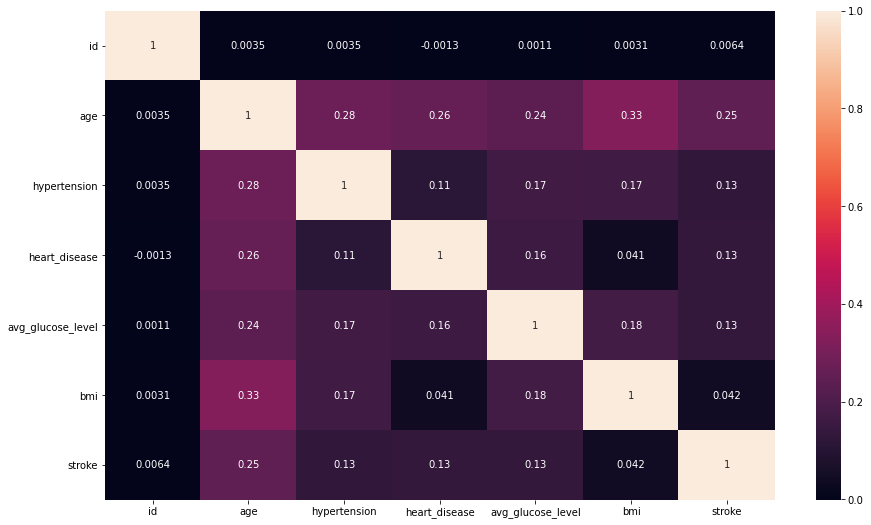

In [15]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

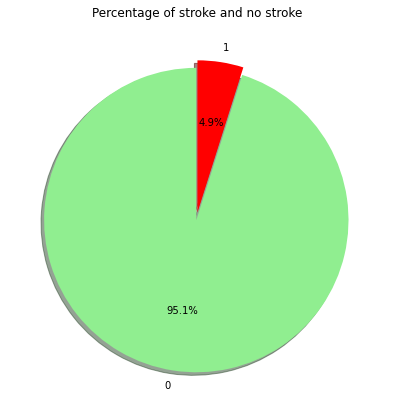

In [16]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)
 
colors = ["lightgreen","red"]
explode = (0.05,0) 
  
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
 
plt.title('Percentage of stroke and no stroke')
plt.show()

Only 4.9% of the patients in the data will have stroke

## Count Plot

##### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

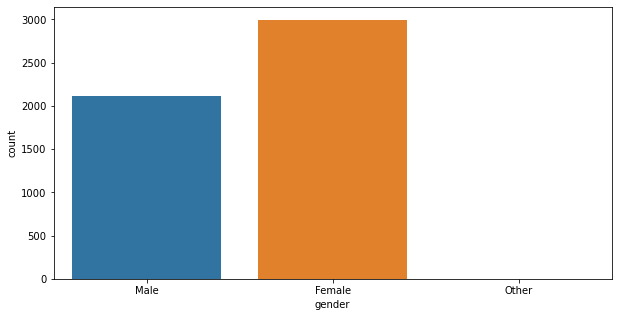

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='gender')  

Above, you can see the Females present in our dataset is higher than males.

##### Marriage Status

<AxesSubplot:xlabel='ever_married', ylabel='count'>

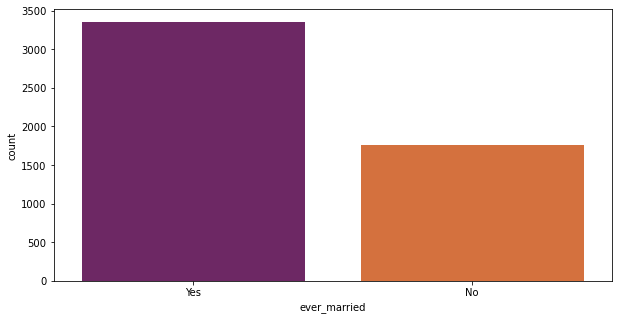

In [18]:
plt.figure(figsize=(10,5))
strok=df.loc[df['stroke']==1]
sns.countplot(data=df,x='ever_married',palette='inferno') 

Patients married are more in the dataset,the ratio from above is around 2:1 for being ever married. 

##### Work Type

<AxesSubplot:xlabel='work_type', ylabel='count'>

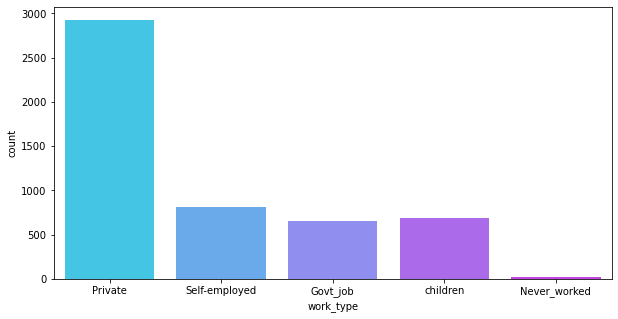

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='work_type',palette='cool')  

A lot of people works in Private sector, private work_type patients tend to have more stroke

##### Smoking Status

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

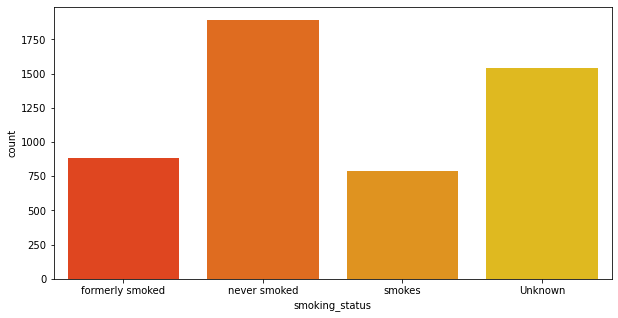

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='smoking_status',palette='autumn')

smokers and non-smokers both can have strokes

##### Residence Type

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

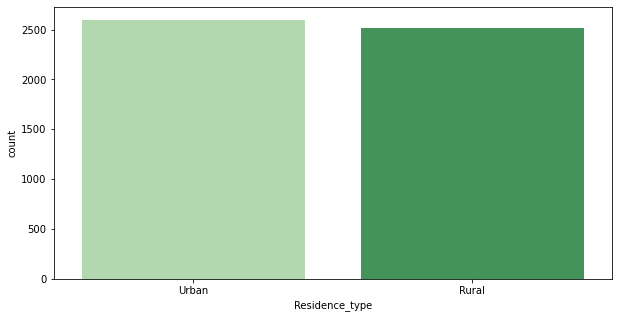

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Residence_type',palette='Greens')

Patients who are in urban residence type are more

##### Heart Disease

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='heart_disease',palette='Reds')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

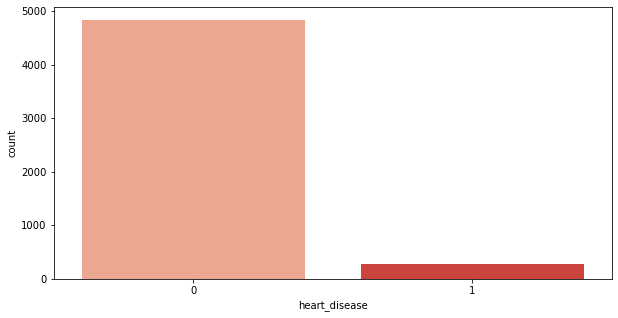

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='heart_disease',palette='Reds')

patients who does not have a heart disease are more

##### Hypertension

<AxesSubplot:xlabel='hypertension', ylabel='count'>

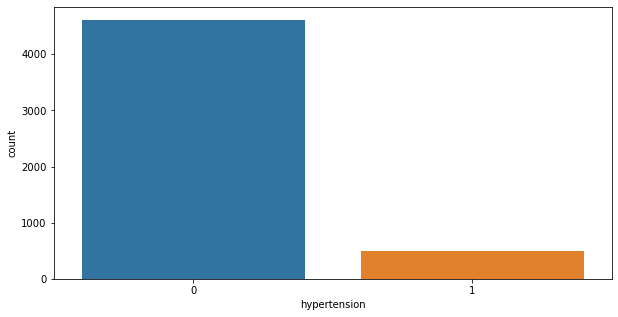

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='hypertension')

From above, it shows that less patients with  hypertension

# Distribution Plot

##### Avg. Glucose Level

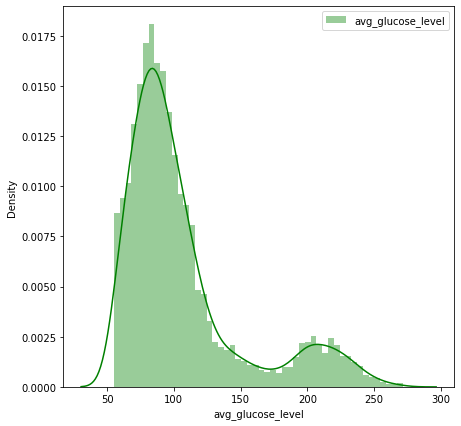

In [24]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

##### BMI

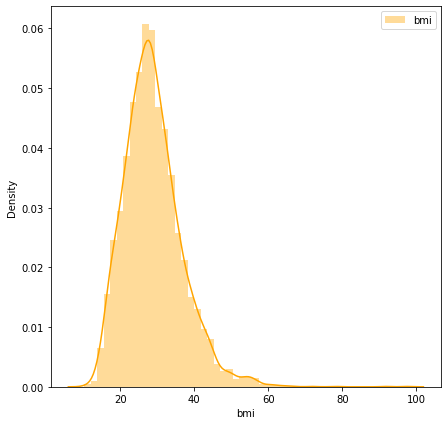

In [25]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.bmi, color="orange", label="bmi", kde= True)
plt.legend()

##### No Stroke v/s Stroke by BMI

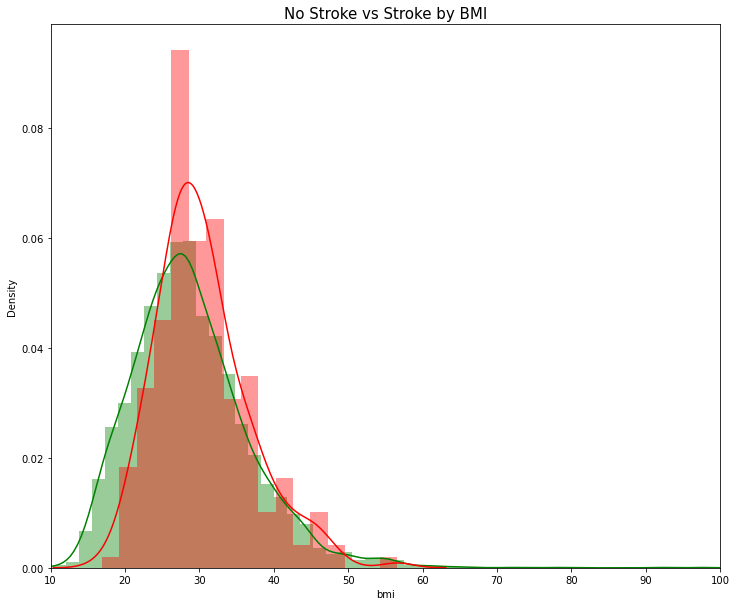

In [26]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

From the graph, it shows that the density of overweight people who suffered a stroke is more.

##### Age vs BMI with hue = stroke

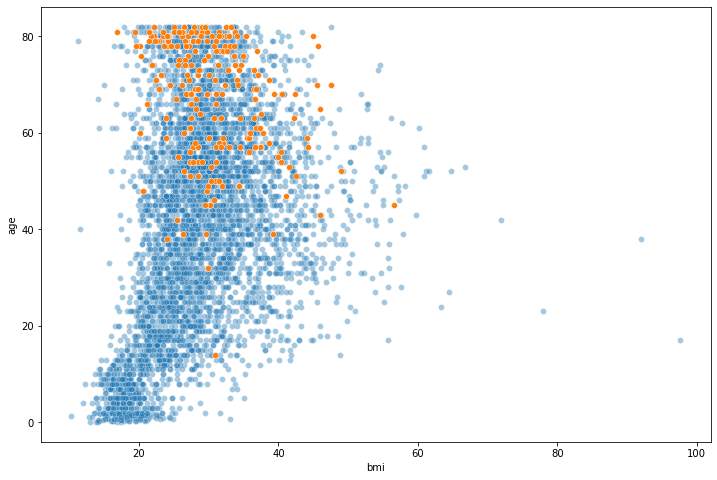

In [27]:
# Age vs BMI with hue = stroke
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="age", alpha=0.4, data=df[df['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=1, data=df[df['stroke'] == 1], ax=ax)
plt.show()

From the above Age vs BMI plot we can clearly see that when people attain an age of 40 or greater the chances of getting a stroke increases and after 60+ it tends to increase even more. Also, people with a BMI of 25+ have shown a higher chances of encountering a stroke.

So, people with 40+ years and BMI of 25+ have a greater probability of encountering a stroke.

##### Avg Glucose level vs BMI with hue = stroke

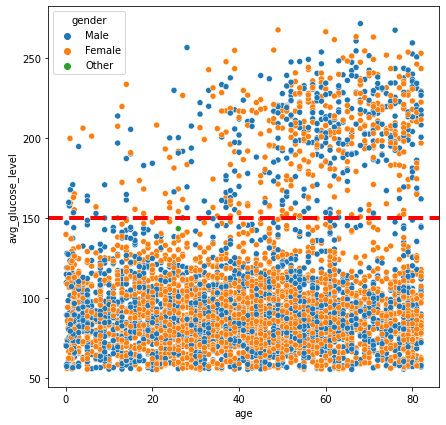

In [28]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

From above plot, we can see that people having glucose level above 150 are relatively less as compare one below. So, we can say that people above 150 might be suffering from diabetes.

# Pair Plot

<Figure size 720x720 with 0 Axes>

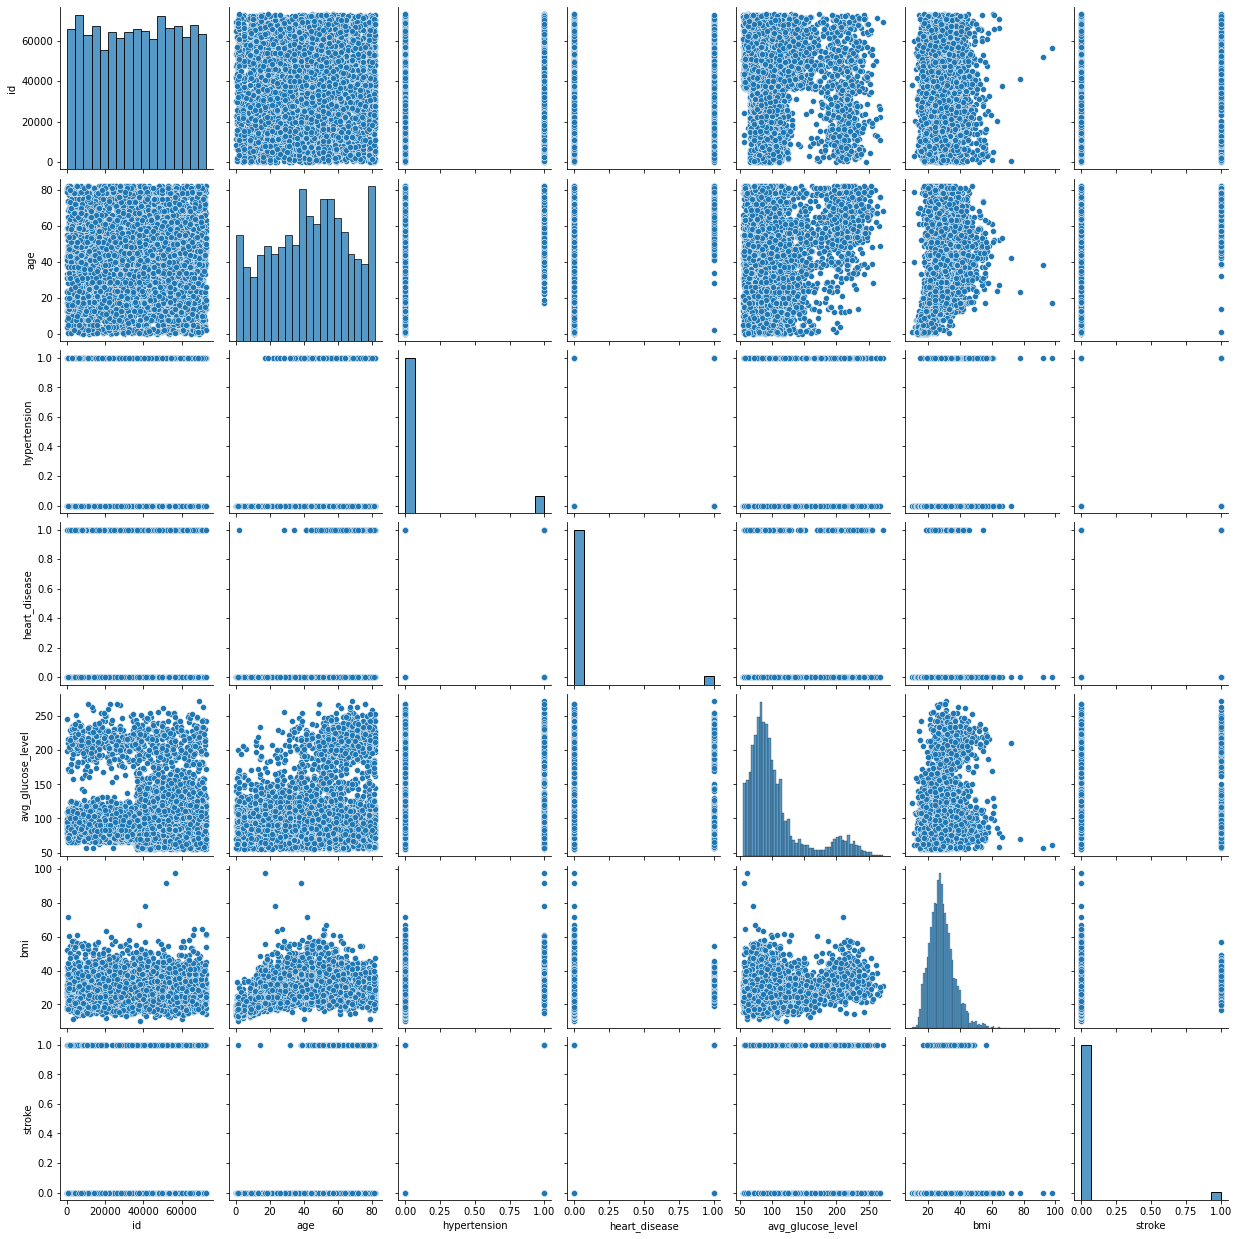

In [30]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

# Removing insignificant variables

In [31]:
df=df.drop('id', axis = 1)  #dropping id column

# Distribution of numeric independent variables

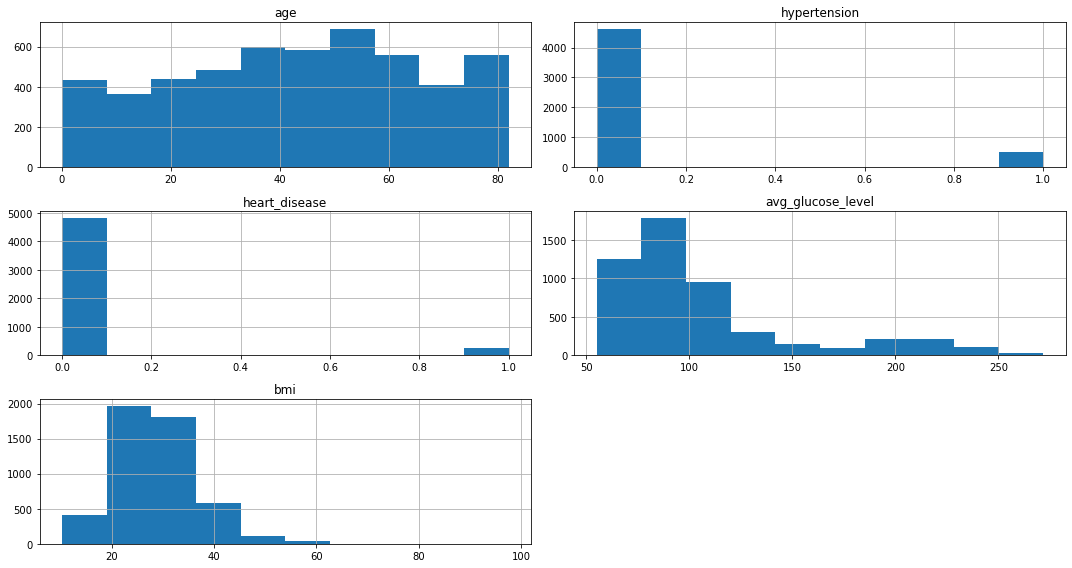

Skewness:


age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

In [32]:
df.drop('stroke', axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df.drop('stroke', axis = 1).skew()

# Distribution of dependent variable(stroke)

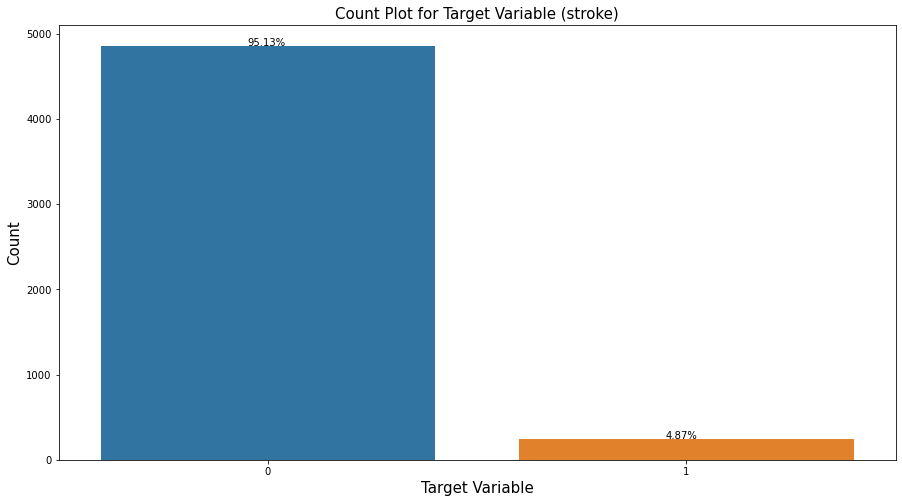

In [33]:
df_target = df['stroke'].copy()
df_target.value_counts()
sns.countplot(x = df_target)
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.title('Count Plot for Target Variable (stroke)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# Data Preprocessing

# Missing Value Treatment

In [34]:
Total = df.isnull().sum().sort_values(ascending=False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
bmi,201,3.933464
stroke,0,0.000000
smoking_status,0,0.000000
avg_glucose_level,0,0.000000
Residence_type,0,0.000000
work_type,0,0.000000
ever_married,0,0.000000
heart_disease,0,0.000000
hypertension,0,0.000000
age,0,0.000000


Only bmi has missing values

<AxesSubplot:>

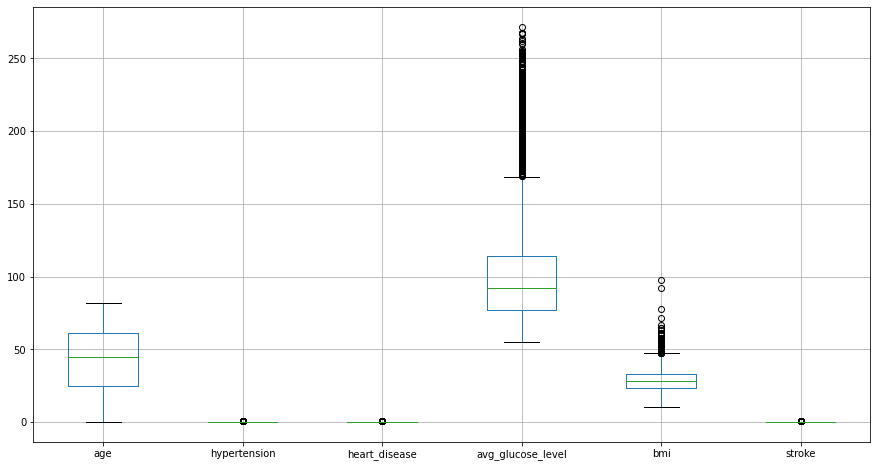

In [35]:
df.boxplot()

In [36]:
df['bmi'].fillna(df['bmi'].median(),inplace = True)

In [37]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [40]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(include=np.number)

In [41]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Encoding the Categorical Variables

In [42]:
label = LabelEncoder()
df['gender'] = label.fit_transform(df['gender'])
df['gender'].unique()

array([1, 0, 2])

In [43]:
df['ever_married'] = label.fit_transform(df['ever_married'])

In [44]:
df['work_type'] = label.fit_transform(df['work_type'])

In [45]:
df['Residence_type'] = label.fit_transform(df['Residence_type'])

In [46]:
df['smoking_status']= label.fit_transform(df['smoking_status'])

In [47]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1,1
1,0,61.000000,0,0,1,3,0,202.210000,28.100000,2,1
2,1,80.000000,0,1,1,2,0,105.920000,32.500000,2,1
3,0,49.000000,0,0,1,2,1,171.230000,34.400000,3,1
4,0,79.000000,1,0,1,3,0,174.120000,24.000000,2,1


In [48]:
df_target=df['stroke']  #y-target variable
df_features=df.drop('stroke',axis=1)

In [49]:
for i in range(len(df_target)):
    if df_target[i]==1:
        df_target[i]=1
    else:
        df_target[i]=0
df_target=df_target.astype('int')

In [50]:
X=df_features
y=df_target

In [51]:
X=pd.DataFrame(X)
X.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1
1,0,61.000000,0,0,1,3,0,202.210000,28.100000,2


# Checking Balancing of data

In [52]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

The data is imbalanced

In [53]:
X = df.drop('stroke',axis = 1)
y = df['stroke']

In [54]:
smo = SMOTE(random_state=42)
X_sm, y_sm = smo.fit_resample(X, y)
y_sm.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

# Train-test split

In [55]:
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3577, 11)
y_train (3577,)
X_test (1533, 11)
y_test (1533,)


## Logistic Regression

In [56]:
logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.151636
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3577
Model:                          Logit   Df Residuals:                     3566
Method:                           MLE   Df Model:                           10
Date:                Sun, 04 Apr 2021   Pseudo R-squ.:                  0.2033
Time:                        16:21:46   Log-Likelihood:                -542.40
converged:                       True   LL-Null:                       -680.80
Covariance Type:            nonrobust   LLR p-value:                 1.242e-53
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.9047      0.662    -10.438      0.000      -8.201      -5.608
gender               -0.0044      0.171     -0.026      0.980      -0.340       0.331
age                   0.0718      0.006     11.238      0.000       0.059       0.084
hypertension          0.5337      0.196      2.728      0.006       0.150       0.917
heart_disease         0.3930      0.227      1.728      0.084      -0.053       0.839
ever_married         -0.3852      0.252     -1.527      0.127      -0.880       0.109
work_type            -0.0715      0.087     -0.825      0.409      -0.241       0.098
Residence_type        0.0486      0.167      0.290      0.772      -0.279       0.377
avg_glucose_level     0.0027      0.001      1.862      0.063      -0.000       0.006
bmi                  -0.0086      0.014     -0.622      0.534      -0.036       0.018
smoking_status        0.0182      0.087      0.209      0.834      -0.152       0.188
=====================================================================================
"""

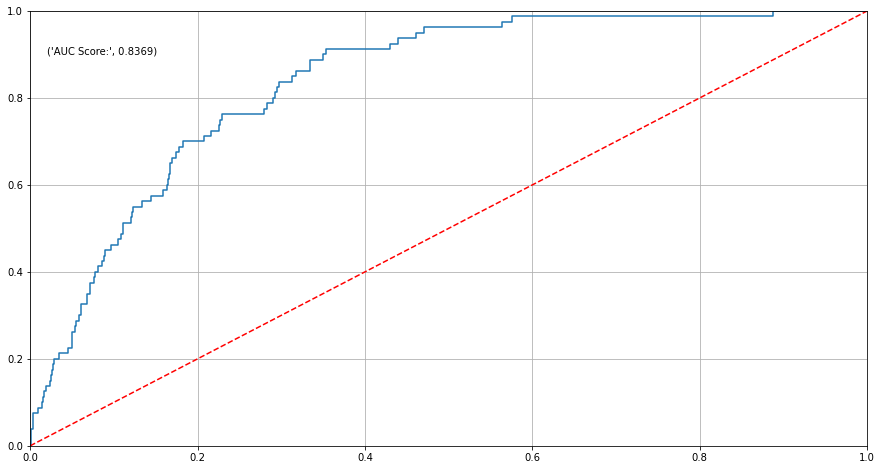

In [57]:
y_pred_prob=logreg.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

## Naive Bayes

In [58]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train,y_train)

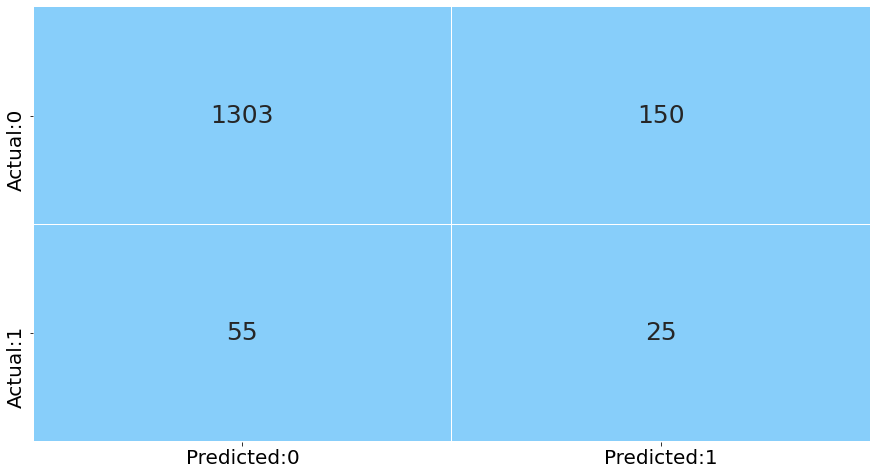

In [59]:
y_pred_prob = gnb_model.predict(X_test)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})


plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [60]:
test_pred = gnb_model.predict(X_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1453
           1       0.14      0.31      0.20        80

    accuracy                           0.87      1533
   macro avg       0.55      0.60      0.56      1533
weighted avg       0.92      0.87      0.89      1533



In [61]:
TP=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[1,1]

precision = TP/(TP+FN)
precision

0.959499263622975

In [62]:
recall = TP/(TP+FP)
recall

0.8967653131452168

In [63]:
F1_score=2*(precision*recall)/(precision+recall)
F1_score

0.9270722162931342

In [64]:
accuracy=(TP+TN)/(TP+FP+FN+TN)
accuracy

0.8662752772341813

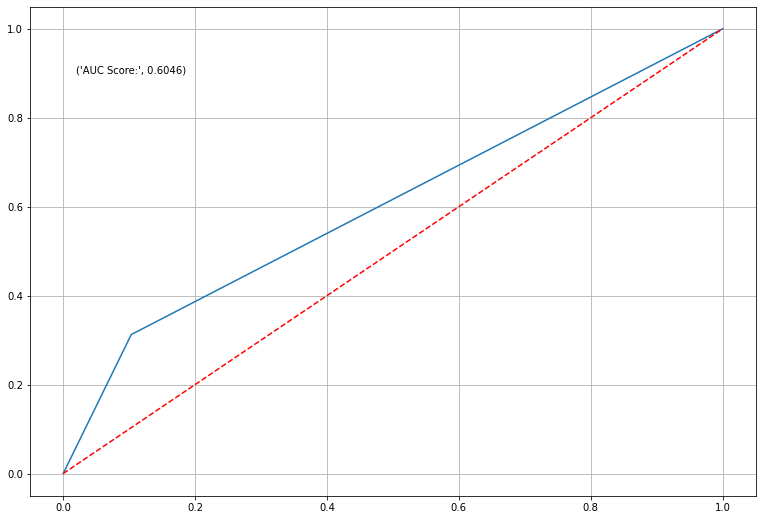

In [65]:
plt.figure(figsize=(13,9))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

# KNN Algorithm

In [66]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [67]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

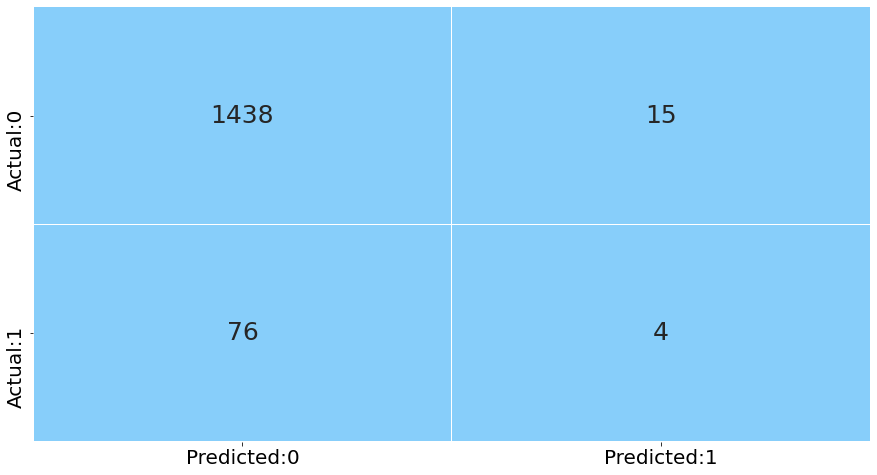

In [68]:
plot_confusion_matrix(knn_model)

In [69]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [70]:
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1453
           1       0.21      0.05      0.08        80

    accuracy                           0.94      1533
   macro avg       0.58      0.52      0.53      1533
weighted avg       0.91      0.94      0.92      1533



In [71]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for stroke Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

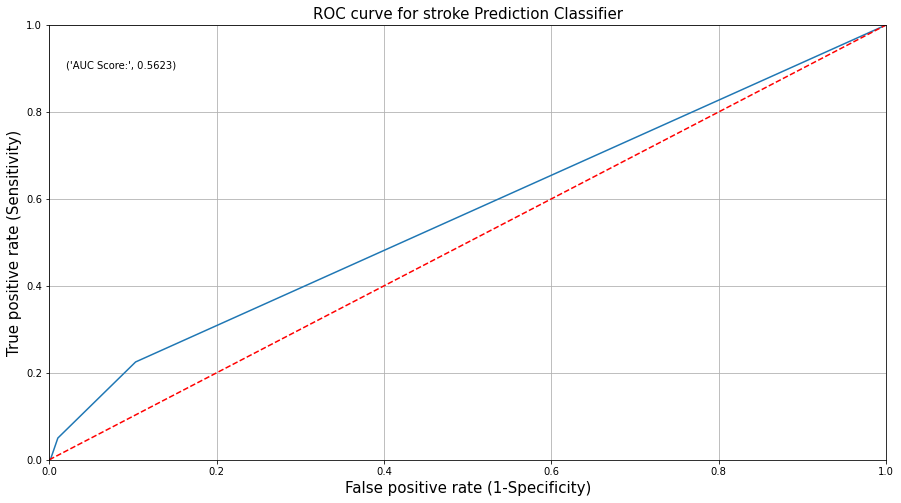

In [72]:
plot_roc(knn_model)

# Optimal value of k

In [74]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'hamming', 'n_neighbors': 9} 



# Building knn model with the tuned parameters

In [75]:
knn_classification=KNeighborsClassifier(n_neighbors=9,metric='hamming')
knn_model=knn_classification.fit(X_train,y_train)

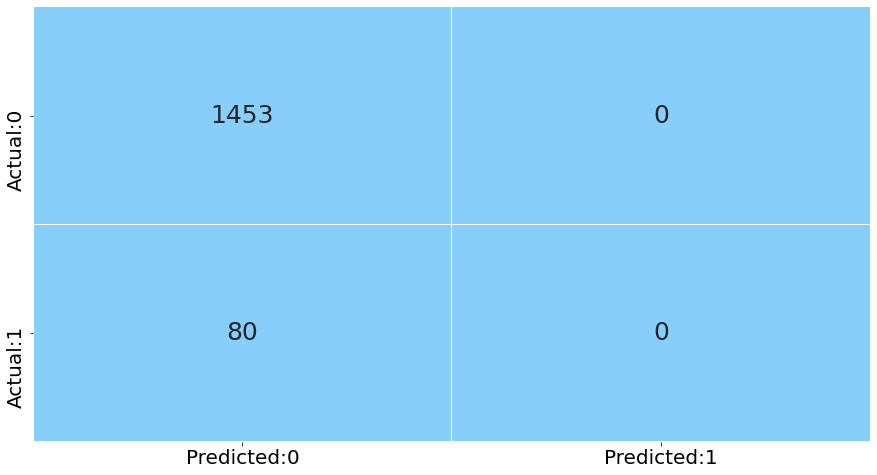

In [76]:
plot_confusion_matrix(knn_model)

In [77]:
test_report=get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



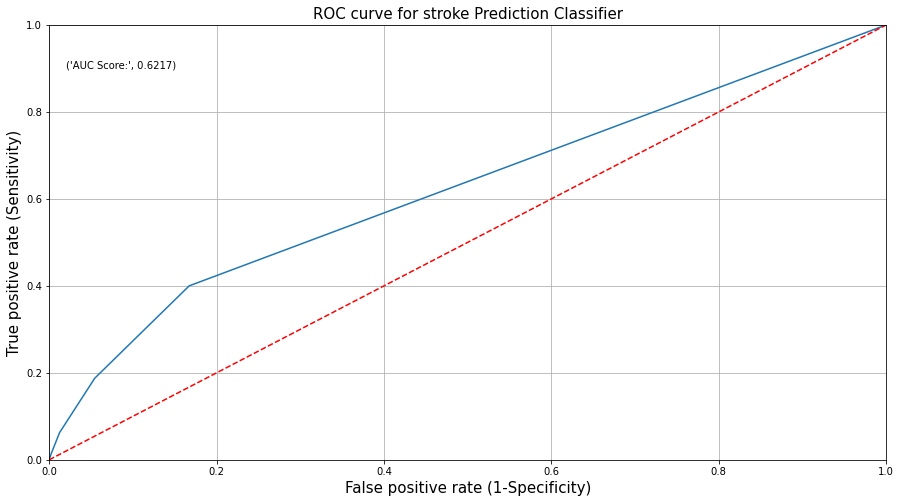

In [78]:
plot_roc(knn_grid)

In [79]:
#missclassified=fn+fp/(tp+fp+fn+tn)
missclassified=(FN+FP)/(TP+FP+FN+TN)
missclassified

0.13372472276581865

# Decision Tree

In [80]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

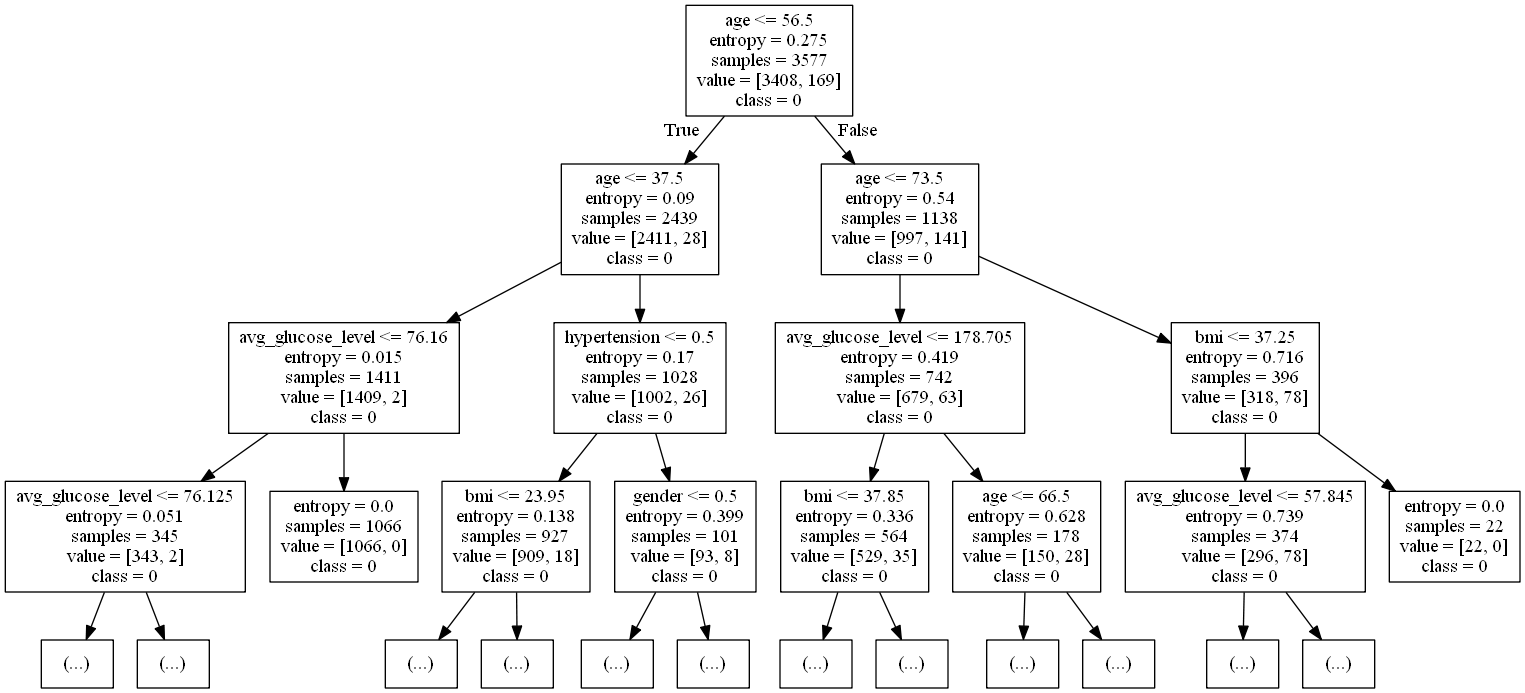

In [81]:
labels = X_train.columns
dot_data = tree.export_graphviz(decision_tree, feature_names = labels, class_names = ["0","1"],max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [82]:
def get_train_report(model): 
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [83]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [84]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3408
           1       1.00      1.00      1.00       169

    accuracy                           1.00      3577
   macro avg       1.00      1.00      1.00      3577
weighted avg       1.00      1.00      1.00      3577



In [85]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1453
           1       0.09      0.07      0.08        80

    accuracy                           0.91      1533
   macro avg       0.52      0.52      0.52      1533
weighted avg       0.90      0.91      0.91      1533



In [86]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)
tree_grid_model = tree_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'min_samples_leaf': 5, 'min_samples_split': 2} 



# Building  DT model using tuned hyperparameter

In [87]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

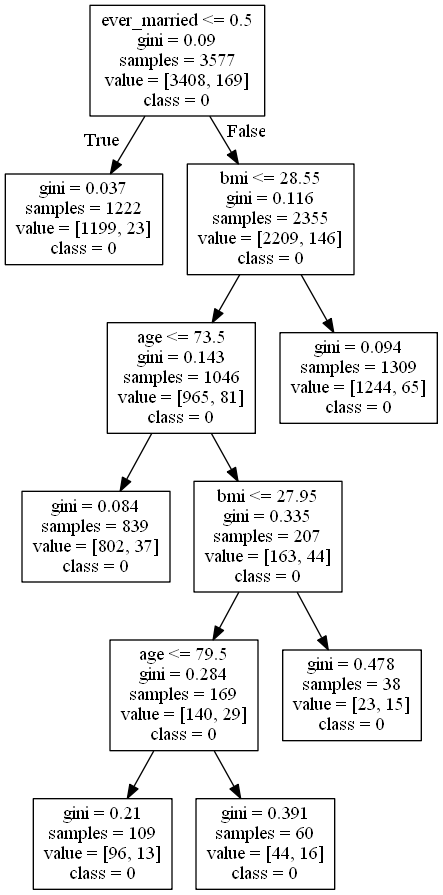

In [88]:
labels = X_train.columns
dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["0","1"])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [89]:
print('Classification Report for train set: \n', get_train_report(dt_model))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3408
           1       0.00      0.00      0.00       169

    accuracy                           0.95      3577
   macro avg       0.48      0.50      0.49      3577
weighted avg       0.91      0.95      0.93      3577



In [90]:
print('Classification Report for test set: \n', get_test_report(dt_model))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



# Random Forest

In [91]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [92]:
train_report = get_train_report(rf_model)
print(train_report) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3408
           1       1.00      0.82      0.90       169

    accuracy                           0.99      3577
   macro avg       1.00      0.91      0.95      3577
weighted avg       0.99      0.99      0.99      3577



In [93]:
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.94      0.92      1533



In [94]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(X_train, y_train)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10} 



# Building  RF model on tuned hyperparameters

In [95]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)
rf_model = rf_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



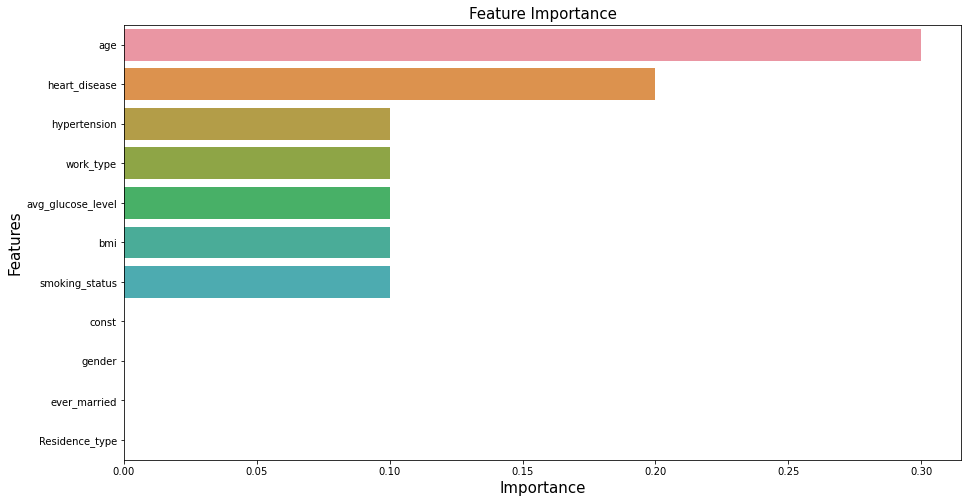

In [96]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

# Stacking

In [97]:
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [98]:
dummy_var=pd.concat([df_num,df['ever_married'],df['work_type'],df['Residence_type'],df['smoking_status']],axis=1)

In [99]:
X = pd.concat([df_num_scaled, dummy_var], axis = 1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married,work_type,Residence_type,smoking_status
0,1.051434,-0.328602,4.185032,2.706375,1.005086,4.418381,67.000000,0,1,228.690000,36.600000,1,1,2,1,1
1,0.786070,-0.328602,-0.238947,2.121559,-0.098981,4.418381,61.000000,0,0,202.210000,28.100000,1,1,3,0,2
2,1.626390,-0.328602,4.185032,-0.005028,0.472536,4.418381,80.000000,0,1,105.920000,32.500000,1,1,2,0,2
3,0.255342,-0.328602,-0.238947,1.437358,0.719327,4.418381,49.000000,0,0,171.230000,34.400000,1,1,2,1,3
4,1.582163,3.043196,-0.238947,1.501184,-0.631531,4.418381,79.000000,1,0,174.120000,24.000000,1,1,3,0,2


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (4088, 16)
y_train (4088,)
X_test (1022, 16)
y_test (1022,)


In [101]:
base_learners = [('KNN_model', KNeighborsClassifier(n_neighbors =9, metric = 'hamming')),
                 ('NB_model', GaussianNB())]
stack_model = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier())
stack_model.fit(X_train, y_train)

[17:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('KNN_model',
                                KNeighborsClassifier(metric='hamming',
                                                     n_neighbors=9)),
                               ('NB_model', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 gamma=None, gpu_id=None,
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                           

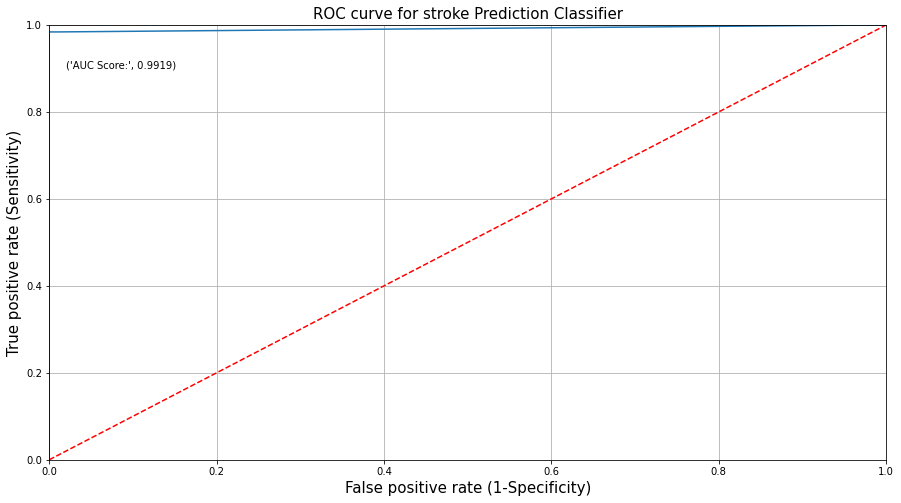

In [102]:
plot_roc(stack_model)

In [103]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 2, min_samples_leaf = 1, min_samples_split = 2, 
                                                     n_estimators = 10, random_state = 10)),
                 ('Decision_Tree', DecisionTreeClassifier(criterion = 'gini',random_state=10,max_depth= 5,max_features='sqrt',
                                                          max_leaf_nodes= 6,min_samples_leaf= 5,min_samples_split= 2))]
stack_model2 = StackingClassifier(estimators = base_learners, final_estimator =AdaBoostClassifier(n_estimators=40))
stack_model2.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=2,
                                                       n_estimators=10,
                                                       random_state=10)),
                               ('Decision_Tree',
                                DecisionTreeClassifier(max_depth=5,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=6,
                                                       min_samples_leaf=5,
                                                       random_state=10))],
                   final_estimator=AdaBoostClassifier(n_estimators=40))

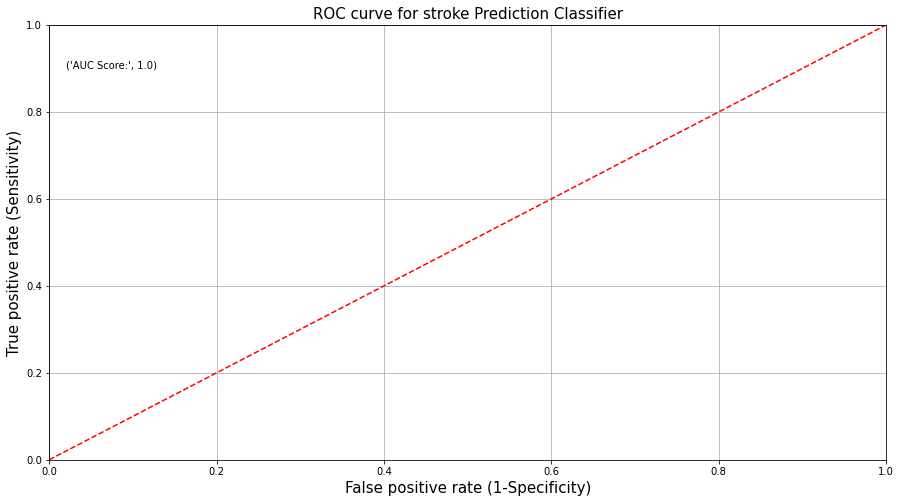

In [104]:
plot_roc(stack_model2)

# XGBoost on training dataset

In [128]:
xgb=XGBClassifier(
                max_depth = 3,gamma=3,learning_rate=0.3)
xgb_model = xgb.fit(X_train, y_train)

[17:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


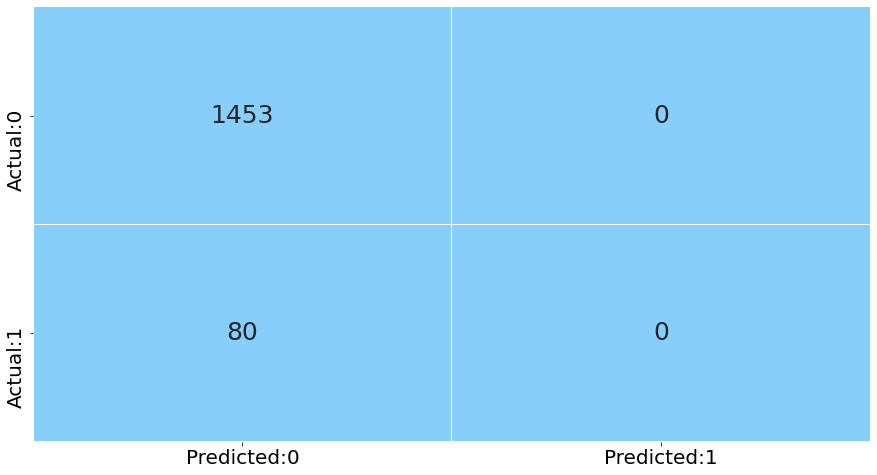

In [129]:
plot_confusion_matrix(xgb_model)

In [130]:
test_report = get_test_report(xgb_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



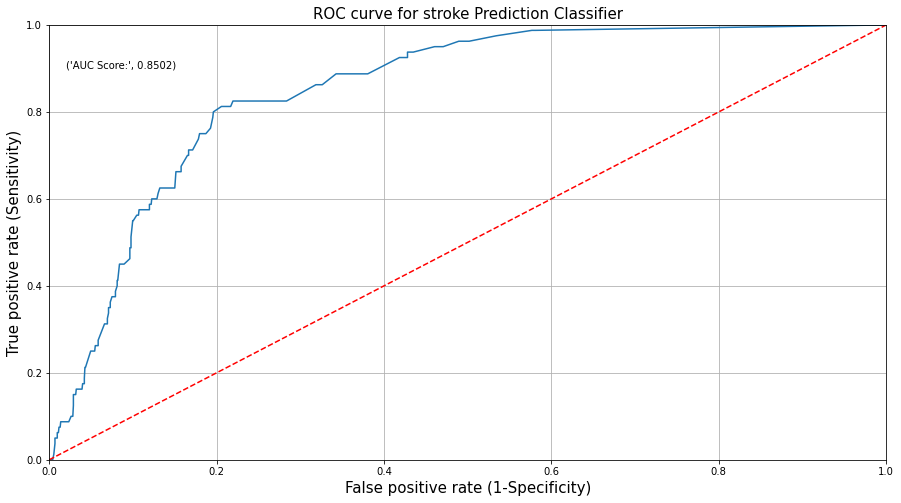

In [131]:
plot_roc(xgb_model)

# Tuning parameters for XGB model

In [127]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[17:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:51:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:51:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:51:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:51:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:51:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:52:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:52:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:52:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Building  XGBmodel on tuned hyperparameters

In [132]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))
xgb_model = xgb_grid_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(xgb_model))

[17:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report for test set:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.00      0.00      0.00        80

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



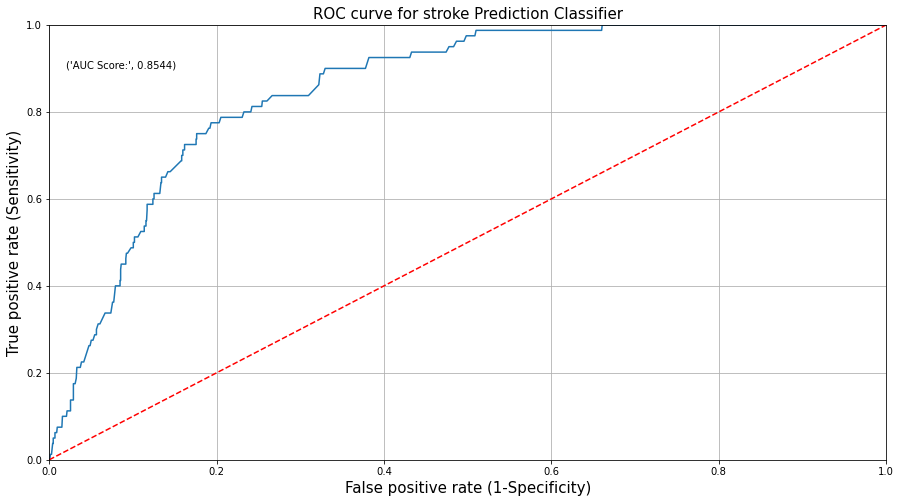

In [133]:
plot_roc(xgb_model)

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

In [117]:
X=df_features
y=df_target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3577, 10)
y_train (3577,)
X_test (1533, 10)
y_test (1533,)


In [118]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)


Logistic Regreesion :
[[1449    4]
 [  78    2]]
Accuracy Score:  0.9465101108936725

K-Fold Validation Mean Accuracy: 95.25 %

Standard Deviation: 0.12 %

ROC AUC Score: 0.51

Precision: 0.33

Recall: 0.03

F1: 0.05
-----------------------------------

KNeighbors :
[[1442   11]
 [  79    1]]
Accuracy Score:  0.9412915851272016

K-Fold Validation Mean Accuracy: 94.27 %

Standard Deviation: 0.47 %

ROC AUC Score: 0.50

Precision: 0.08

Recall: 0.01

F1: 0.02
-----------------------------------

GaussianNB :
[[1303  150]
 [  55   25]]
Accuracy Score:  0.8662752772341813

K-Fold Validation Mean Accuracy: 87.25 %

Standard Deviation: 1.90 %

ROC AUC Score: 0.60

Precision: 0.14

Recall: 0.31

F1: 0.20
-----------------------------------

Decision Tree :
[[1384   69]
 [  68   12]]
Accuracy Score:  0.9106327462491846

K-Fold Validation Mean Accuracy: 91.03 %

Standard Deviation: 1.34 %

ROC AUC Score: 0.55

Precision: 0.15

Recall: 0.15

F1: 0.15
-----------------------------------

Random F